In [9]:
import pandas as pd
import numpy as np

subpath = "distrib_experiment_y_original_k_fold/2025-02-20T21:51:58"
data = pd.read_csv(f'{subpath}/total_X.csv', index_col=False)


In [10]:
data.drop(columns=['Unnamed: 6'], inplace=True)

In [12]:
data[data['período'] == 8].sort_values(by=['carga', 'apps', 'método'], ascending=False)

,período,carga,apps,feature,método,nmae
46,8,PeriodicLoad,SingleApp,DispFrames,RT,0.104862
47,8,PeriodicLoad,SingleApp,DispFrames,RF,0.097431
22,8,PeriodicLoad,BothApps,DispFrames,RT,0.147673
23,8,PeriodicLoad,BothApps,DispFrames,RF,0.138518
34,8,FlashcrowdLoad,SingleApp,DispFrames,RT,0.109967
35,8,FlashcrowdLoad,SingleApp,DispFrames,RF,0.103334
10,8,FlashcrowdLoad,BothApps,DispFrames,RT,0.100738
11,8,FlashcrowdLoad,BothApps,DispFrames,RF,0.094461


In [7]:
import scipy.stats as st

group = data.groupby(["período"])['nmae'].agg(['mean', 'std', 'count']).reset_index()
# Compute standard error
group['se'] = group['std'] / np.sqrt(group['count'])

# Compute 95% confidence interval using t-student
group['ci'] = group.apply(lambda row: st.t.ppf(0.975, df=row['count']-1) * row['se'], axis=1)

# Print results as "mean ± ci"
for _, row in group.iterrows():
  print(f"{row['período']}: {row['mean']:.3f} ± {row['ci']:.3f}")


8.0: 0.112 ± 0.017
16.0: 0.110 ± 0.017
32.0: 0.113 ± 0.015
64.0: 0.120 ± 0.013
128.0: 0.130 ± 0.018
256.0: 0.138 ± 0.022


In [4]:
group_carga = data.groupby(["carga", "período"])['nmae'].agg(['mean', 'std']).reset_index()

In [5]:
group_carga['std'] = round(100*group_carga['std'], 0)
group_carga['mean'] = round(100*group_carga['mean'], 0)

In [6]:
group_carga

,carga,período,mean,std
0,FlashcrowdLoad,8,10.0,1.0
1,FlashcrowdLoad,16,10.0,1.0
2,FlashcrowdLoad,32,10.0,0.0
3,FlashcrowdLoad,64,12.0,1.0
4,FlashcrowdLoad,128,13.0,1.0
5,FlashcrowdLoad,256,12.0,1.0
6,PeriodicLoad,8,12.0,2.0
7,PeriodicLoad,16,12.0,2.0
8,PeriodicLoad,32,12.0,2.0
9,PeriodicLoad,64,12.0,2.0


In [7]:
group = data.groupby(["período"])['nmae'].agg(['mean', 'std']).reset_index()

In [8]:
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)

In [9]:
group

,período,mean,std
0,8,11.0,2.0
1,16,11.0,2.0
2,32,11.0,2.0
3,64,12.0,2.0
4,128,13.0,2.0
5,256,14.0,3.0


In [10]:
new_data = pd.DataFrame({'período': [1], 'mean': [12], 'std': [2]})

total_table = pd.concat([group, new_data], ignore_index=True)


In [11]:
total_table.set_index('período', inplace=True)

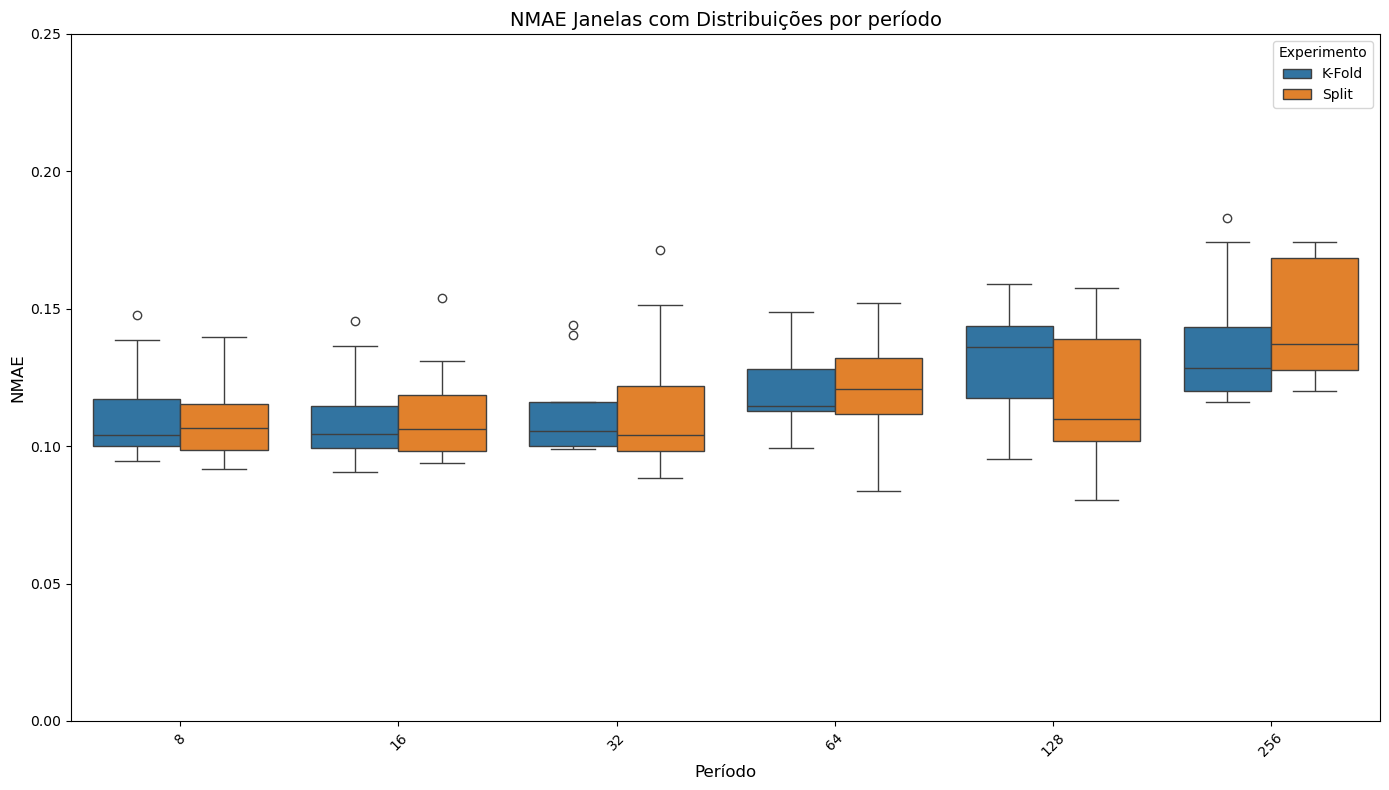

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reference_split = pd.read_csv(f'distrib_experiment_y_original/2025-01-05T17:06:02/total_X.csv', index_col=False)
reference_tptt = pd.read_csv(f'distrib_tptt_experiment_y_original/2025-01-20T17:47:12/total_X.csv', index_col=False)

data['Experimento'] = 'K-Fold'
reference_split['Experimento'] = 'Split'
data_combined = pd.concat([data, reference_split, ], ignore_index=True)


plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data_combined, hue='Experimento')

plt.xlabel("Período", fontsize=12)
plt.ylabel("NMAE", fontsize=12)
plt.title("NMAE Janelas com Distribuições por período", fontsize=14)
plt.xticks(rotation=45)
y_limits = (0, 0.25)
plt.ylim(y_limits)
plt.tight_layout()

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

univariate = pd.read_csv(f'distrib_experiment_y_original_k_fold/2025-02-20T21:51:58/minimal_with_univariate.csv', index_col=False)

data['Experimento'] = ''
univariate['Experimento'] = 'Split'
data_combined = pd.concat([data, reference_split, ], ignore_index=True)


plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data_combined, hue='Experimento')

plt.xlabel("Período", fontsize=12)
plt.ylabel("NMAE", fontsize=12)
plt.title("NMAE Janelas com Distribuições por período", fontsize=14)
plt.xticks(rotation=45)
y_limits = (0, 0.25)
plt.ylim(y_limits)
plt.tight_layout()

plt.show()

In [11]:
group_by_method = data.groupby(["período", "método"])['nmae'].agg(['mean', 'std']).reset_index()

In [12]:
group_by_method['std'] = round(100*group_by_method['std'], 0)
group_by_method['mean'] = round(100*group_by_method['mean'], 0)

In [13]:
group_by_method

,período,método,mean,std
0,8,RF,9.0,2.0
1,8,RT,9.0,2.0
2,16,RF,11.0,2.0
3,16,RT,11.0,2.0
4,32,RF,11.0,3.0
5,32,RT,11.0,2.0
6,64,RF,12.0,1.0
7,64,RT,12.0,2.0
8,128,RF,13.0,5.0
9,128,RT,14.0,5.0


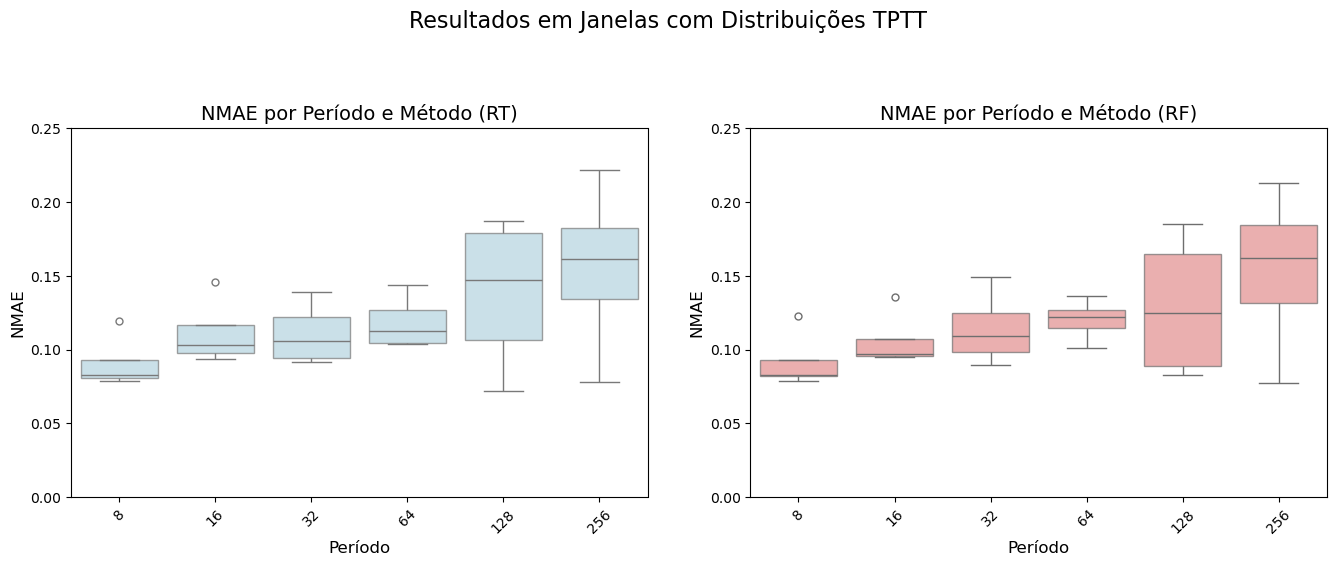

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.25)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RT'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Método (RT)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RF'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Método (RF)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Resultados em Janelas com Distribuições TPTT", fontsize=16)

plt.tight_layout(pad=3.0)

plt.show()


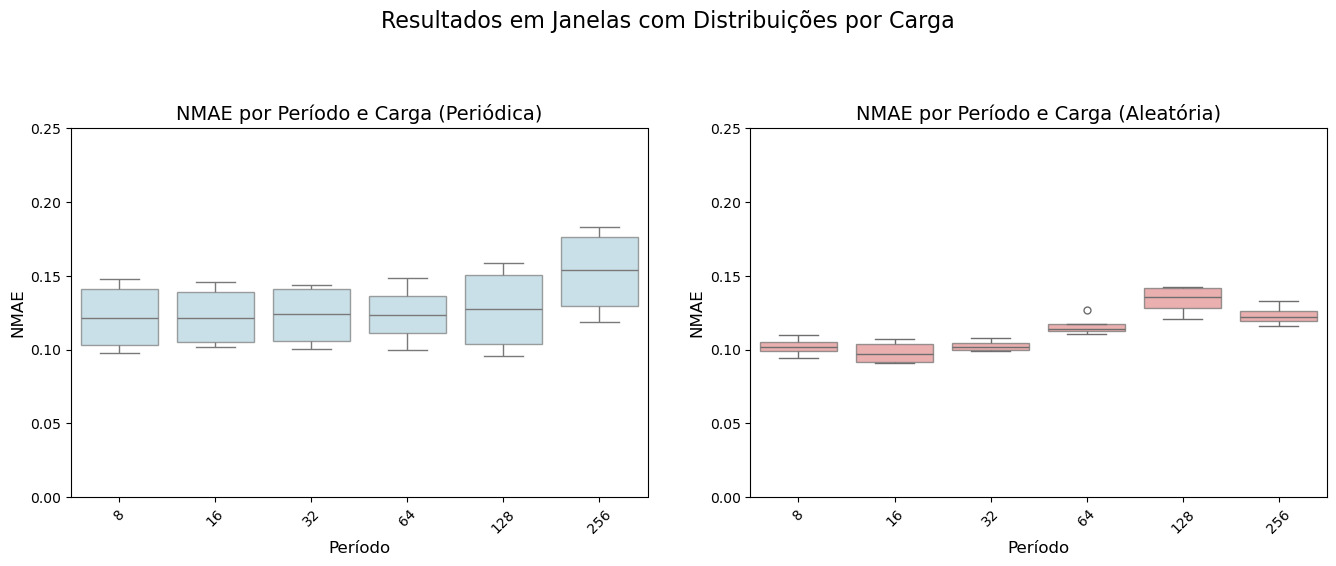

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.25)

sns.boxplot(x='período', y='nmae', data=data[data['carga'] == 'PeriodicLoad'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Carga (Periódica)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['carga'] == 'FlashcrowdLoad'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Carga (Aleatória)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

fig.suptitle("Resultados em Janelas com Distribuições por Carga", fontsize=16)

plt.tight_layout(pad=3.0)

plt.show()


In [15]:
data

,período,carga,apps,feature,método,nmae,Experimento
0,256,FlashcrowdLoad,BothApps,DispFrames,RT,0.115916,K-Fold
1,256,FlashcrowdLoad,BothApps,DispFrames,RF,0.120360,K-Fold
2,128,FlashcrowdLoad,BothApps,DispFrames,RT,0.141237,K-Fold
3,128,FlashcrowdLoad,BothApps,DispFrames,RF,0.130579,K-Fold
4,64,FlashcrowdLoad,BothApps,DispFrames,RT,0.126637,K-Fold
5,64,FlashcrowdLoad,BothApps,DispFrames,RF,0.114422,K-Fold
6,32,FlashcrowdLoad,BothApps,DispFrames,RT,0.099129,K-Fold
7,32,FlashcrowdLoad,BothApps,DispFrames,RF,0.100221,K-Fold
8,16,FlashcrowdLoad,BothApps,DispFrames,RT,0.090648,K-Fold
9,16,FlashcrowdLoad,BothApps,DispFrames,RF,0.091670,K-Fold
